### Developing "Momentum" Trading Strategy 

In this project, I will use Momentum Strategy (which is also known as "trend following strategy")

In [66]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf

Now, after I have imported the libraries, I will use the Yahoo finance API to get the stock data. Particularly, we will look at GLD (the Gold ETF)

In [67]:
gld = yf.download('GLD')
day = np.arange(1, len(gld) + 1)
gld['day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace=True)
gld = gld[['day', 'Open', 'High', 'Low', 'Close']]
gld.head()

[*********************100%%**********************]  1 of 1 completed


,day,Open,High,Low,Close
Date,,,,,
2004-11-18,1,44.430000,44.490002,44.070000,44.380001
2004-11-19,2,44.490002,44.919998,44.470001,44.779999
2004-11-22,3,44.750000,44.970001,44.740002,44.950001
2004-11-23,4,44.880001,44.919998,44.720001,44.750000
2004-11-24,5,44.930000,45.049999,44.790001,45.049999


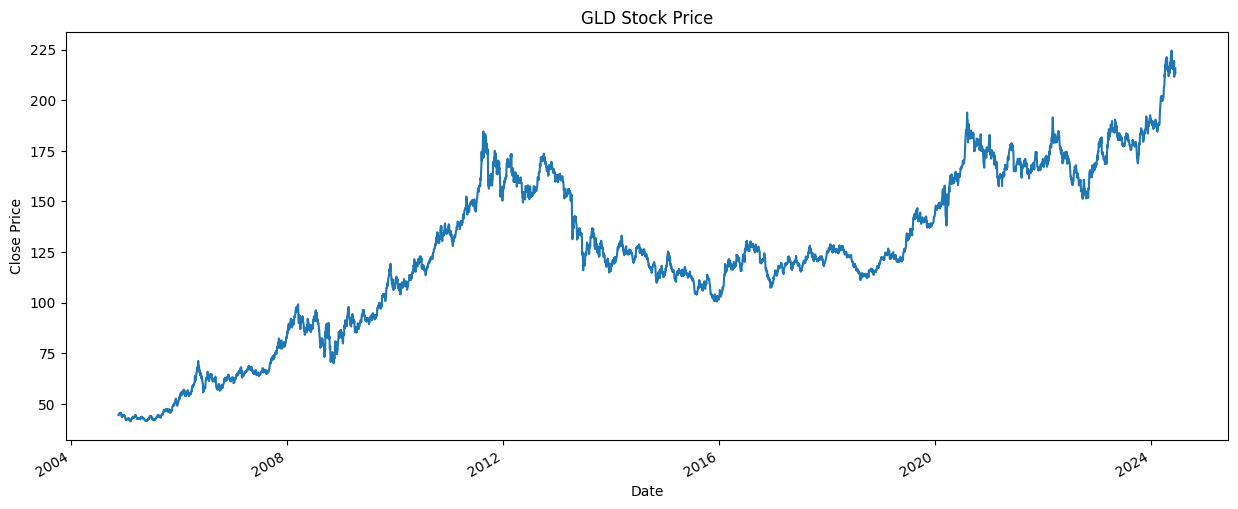

In [68]:
gld['Close'].plot(title='GLD Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [69]:
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4926 entries, 2004-11-18 to 2024-06-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     4926 non-null   int32  
 1   Open    4926 non-null   float64
 2   High    4926 non-null   float64
 3   Low     4926 non-null   float64
 4   Close   4926 non-null   float64
dtypes: float64(4), int32(1)
memory usage: 211.7 KB


For the next step, we will:
* Calculate the signal based on price and statistical action
* Try moving average crossover to generate signals
* There might be some real life variation

#### First we will add moving averages to our data frame

In [70]:
gld['9-day-average'] = gld['Close'].rolling(9).mean().shift()
gld['21-day-average'] = gld['Close'].rolling(21).mean().shift()
#since the close price is after the day, we need to shift it by one day to have the moving average 
gld[19:25]

C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_6024\1358424913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['9-day-average'] = gld['Close'].rolling(9).mean().shift()
C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_6024\1358424913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['21-day-average'] = gld['Close'].rolling(21).mean().shift()


,day,Open,High,Low,Close,9-day-average,21-day-average
Date,,,,,,,
2004-12-16,20,43.990002,44.049999,43.580002,43.680000,44.284444,NaN
2004-12-17,21,43.930000,44.220001,43.779999,44.189999,44.071111,NaN
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.962222,44.594286
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.876666,44.592381
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.900000,44.565714
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,43.926667,44.521428


#### Next, we will add the "signal" column

In [71]:
gld['signal'] = np.where(gld['9-day-average'] > gld['21-day-average'], 1, 0)
gld['signal'] = np.where(gld['9-day-average'] < gld['21-day-average'], -1, gld['signal'])
gld.dropna(inplace=True)
gld.head()

C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_6024\3898814100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['signal'] = np.where(gld['9-day-average'] > gld['21-day-average'], 1, 0)
C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_6024\3898814100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['signal'] = np.where(gld['9-day-average'] < gld['21-day-average'], -1, gld['signal'])
C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_6024\3898814100.py:3: SettingWithCopyWarning: 
A value is tryi

,day,Open,High,Low,Close,9-day-average,21-day-average,signal
Date,,,,,,,,
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.962222,44.594286,-1
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.876666,44.592381,-1
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.900000,44.565714,-1
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,43.926667,44.521428,-1
2004-12-27,26,44.290001,44.560001,44.270000,44.480000,44.018889,44.498571,-1


Generates trading signals based on the moving averages:
* 1 (buy signal) if the 9-day average is greater than the 21-day average.
* -1 (sell signal) if the 9-day average is less than the 21-day average.

#### Calculate Instantaneous returns/system returns

In [72]:
gld['return'] = np.log(gld['Close']).diff()
gld['system_return'] = gld['signal'] * gld['return']
gld['entry'] = gld['signal'].diff()
gld.head()

C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_6024\3662363688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['return'] = np.log(gld['Close']).diff()
C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_6024\3662363688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gld['system_return'] = gld['signal'] * gld['return']
C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_6024\3662363688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,day,Open,High,Low,Close,9-day-average,21-day-average,signal,return,system_return,entry
Date,,,,,,,,,,,
2004-12-20,22,44.330002,44.369999,44.130001,44.340000,43.962222,44.594286,-1,NaN,NaN,NaN
2004-12-21,23,44.130001,44.240002,44.049999,44.220001,43.876666,44.592381,-1,-0.002710,0.002710,0.0
2004-12-22,24,44.200001,44.230000,43.889999,44.020000,43.900000,44.565714,-1,-0.004533,0.004533,0.0
2004-12-23,25,44.169998,44.349998,44.049999,44.270000,43.926667,44.521428,-1,0.005663,-0.005663,0.0
2004-12-27,26,44.290001,44.560001,44.270000,44.480000,44.018889,44.498571,-1,0.004732,-0.004732,0.0


Identifies entry points where the signal changes:
* 2 for short to long.
* -2 for long to short.

Now, we will plot our trade to the time series

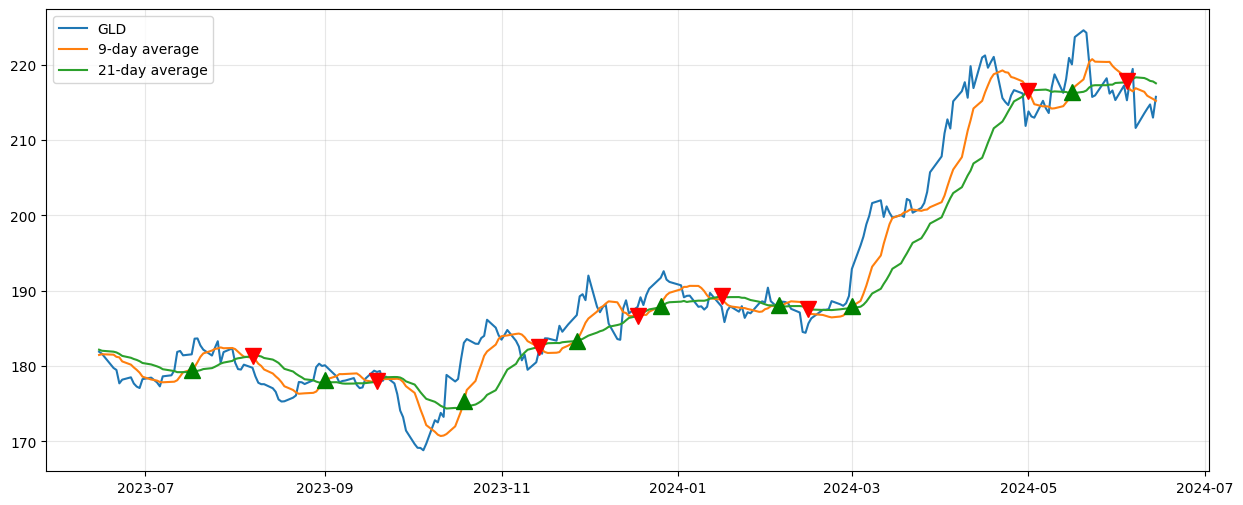

In [73]:
plt.rcParams['figure.figsize'] = 15, 6
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[-252:]['Close'], label = 'GLD')
plt.plot(gld.iloc[-252:]['9-day-average'], label = '9-day average')
plt.plot(gld.iloc[-252:]['21-day-average'], label = '21-day average')
plt.plot(gld[-252:].loc[gld.entry == 2].index, gld[-252:]['9-day-average'][gld.entry == 2], '^', color = 'g', markersize = 12)
plt.plot(gld[-252:].loc[gld.entry == -2].index, gld[-252:]['21-day-average'][gld.entry == -2], 'v', color = 'r', markersize = 12)
plt.legend(loc = 2)
plt.show()

#### Here, we do the following steps:
* Sets the figure size for the plot.
* Adds grid lines with transparency.
* Plots the 'Close' price, 9-day average, and 21-day average for the last 252 days.
* Marks the entry points with green upward triangles for buy signals and red downward triangles for sell signals.
* Adds a legend to the plot.

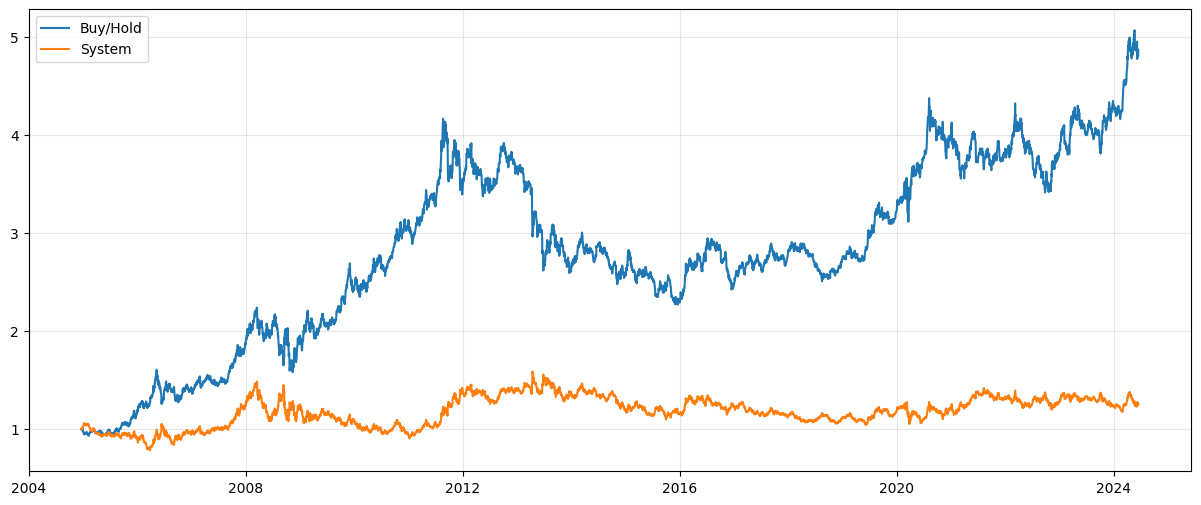

In [74]:
plt.plot(np.exp(gld['return']).cumprod(), label = 'Buy/Hold')
plt.plot(np.exp(gld['system_return']).cumprod(), label = 'System')
plt.legend(loc = 2)

plt.grid(True, alpha = .3)

In [75]:
np.exp(gld['return']).cumprod()[-1] - 1


C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_6024\3599775102.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(gld['return']).cumprod()[-1] - 1


3.8653584795927927

In [76]:
np.exp(gld['system_return']).cumprod()[-1] - 1

C:\Users\Laptop QHD\AppData\Local\Temp\ipykernel_6024\1497219921.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(gld['system_return']).cumprod()[-1] - 1


0.24893311568114562